# Figure 1 and 1S (supplemental) panels

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from pathlib import Path

from scipy.stats import gaussian_kde
import utils.fig_utils as fig_utils

In [3]:
from utils.si_formatting import si_format

In [4]:
import importlib
%load_ext autoreload
%autoreload 2

In [5]:
from utils.fig1_utils import *

Fontconfig warning: ignoring UTF-8: not a valid region tag


In [6]:
# Set the directory for where to save figures, create the directory if it doesn't exist
fig_outdir = 'figures'
data_dir = '../data/'
Path(fig_outdir).mkdir(parents=True, exist_ok=True)

## Data

In [ ]:
# Download data.
fig_utils.download_data(data_dir + 'library1.csv', fig_utils.urls['library1.csv'])
fig_utils.download_data(data_dir + 'library2_pulldown.csv', fig_utils.urls['library2_pulldown.csv'])
fig_utils.download_data(data_dir + 'library2_invivo.csv', fig_utils.urls['library2_invivo.csv'])
fig_utils.download_data(data_dir + 'LY6A_joint_umap_l1_l2.csv', fig_utils.urls['LY6A_joint_umap_l1_l2.csv'])
fig_utils.download_data(data_dir + 'LY6C1_joint_umap_l1_l2.csv', fig_utils.urls['LY6C1_joint_umap_l1_l2.csv'])


In [9]:
# Library 1 data
l1_df = pd.read_csv(data_dir + 'library1.csv')
l1_df

reference               sequence AA_sequence  \
0        AAV9_588_7mer_NNN  AATGCTGTGAGTCGGGCTGGG     NAVSRAG   
1        AAV9_588_7mer_NNN  GTGCGGCCTAATGGGTCTGGT     VRPNGSG   
2        AAV9_588_7mer_NNN  GGTACGCGGCCTGGGCTTTTG     GTRPGLL   
3        AAV9_588_7mer_NNN  TTTGGGGGTTCGCGGACTCCG     FGGSRTP   
4        AAV9_588_7mer_NNN  TTGGATAAGAGGAATCTTGTT     LDKRNLV   
...                    ...                    ...         ...   
1257139  AAV9_588_7mer_NNN  TTTATTGCTACTACGGCGAGT     FIATTAS   
1257140  AAV9_588_7mer_NNN  TCGTCTTTTGATCGTCCGGTG     SSFDRPV   
1257141  AAV9_588_7mer_NNN  GGGGCTCGTGCTCTTCTTTTG     GARALLL   
1257142  AAV9_588_7mer_NNN  GTTGGGCCTGGGATTTATAGT     VGPGIYS   
1257143  AAV9_588_7mer_NNN  GTTCGGACGACTGTGGGTAGT     VRTTVGS   

         starter_virus_1_RPM  starter_virus_2_RPM  starter_virus_3_RPM  \
0                 286.796343           290.756423           292.595688   
1                 284.078454           287.774306           285.164334   
2                 214.476870           205.192600           205.194095   
3                 187.061644           186.726413           189.554977   
4                 179.380655           167.113258           180.681719   
...                      ...                  ...                  ...   
1257139             0.000000             0.000000             0.000000   
1257140             0.000000             0.000000             0.000000   
1257141             0.000000             0.000000             0.000000   
1257142             0.000000             0.000000             0.000000   
1257143             0.000000             0.000000             0.000000   

         starter_virus_mean_RPM   7    Fc_1_RPM    Fc_2_RPM  ...  19  20  \
0                    290.049485 NaN  175.522018  130.271420  ... NaN NaN   
1                    285.672365 NaN   98.292330  521.085681  ... NaN NaN   
2                    208.287855 NaN  125.737591   34.653481  ... NaN NaN   
3                    187.781012 NaN   13.403500  105.243906  ... NaN NaN   
4                    175.725211 NaN  178.075066  666.116917  ... NaN NaN   
...                         ...  ..         ...         ...  ...  ..  ..   
1257139                0.000000 NaN    0.000000    0.000000  ... NaN NaN   
1257140                0.000000 NaN    0.000000    0.000000  ... NaN NaN   
1257141                0.000000 NaN    0.000000    0.000000  ... NaN NaN   
1257142                0.000000 NaN    0.000000    0.000000  ... NaN NaN   
1257143                0.000000 NaN    0.000000    0.000000  ... NaN NaN   

         LY6A_log2enr  LY6C1_1_RPM  LY6C1_2_RPM  LY6C1_3_RPM  LY6C1_mean_RPM  \
0           -3.022314    87.251903    98.762199   107.419123       97.811075   
1           -2.873688   129.735814   160.841296   171.870597      154.149236   
2           -3.867727    18.729466     9.029687    26.538842       18.099332   
3           -2.687263    63.040642    72.801850   107.419123       81.087205   
4           -3.648454    41.113462    31.603904    47.390790       40.036052   
...               ...          ...          ...          ...             ...   
1257139      0.000000     0.000000     0.000000     0.000000        0.000000   
1257140      0.000000     0.000000     0.000000     0.000000        0.000000   
1257141      0.000000     0.000000     0.000000     0.000000        0.000000   
1257142      0.000000     0.000000     0.000000     0.000000        0.000000   
1257143      0.000000     0.000000     0.000000     0.000000        0.000000   

         26  27  LY6C1_log2enr  
0       NaN NaN      -1.568132  
1       NaN NaN      -0.889991  
2       NaN NaN      -3.523843  
3       NaN NaN      -1.211404  
4       NaN NaN      -2.133671  
...      ..  ..            ...  
1257139 NaN NaN       0.000000  
1257140 NaN NaN       0.000000  
1257141 NaN NaN       0.000000  
1257142 NaN NaN       0.000000  
1257143 NaN NaN       0.000000  

[1257144 rows x 29 columns]

In [10]:
# Library 2 data, pulldown assays
l2_df = pd.read_csv(data_dir + 'library2_pulldown.csv')
l2_df

reference               sequence AA_sequence  \
0        AAV9_588_7mer_NNN  TCGCAGTCTAGGCCGTTTCAG     SQSRPFQ   
1        AAV9_588_7mer_NNN  CGGTATGGGGGTGATAGTTCT     RYGGDSS   
2        AAV9_588_7mer_NNN  ACTAATATGACGGTGTCTCGT     TNMTVSR   
3        AAV9_588_7mer_NNN  CCTATGCGGGATCGTGCTGGT     PMRDRAG   
4        AAV9_588_7mer_NNN  GGGGCTCTTGGTTTTATTGCT     GALGFIA   
...                    ...                    ...         ...   
1430373  AAV9_588_7mer_NNN  TCTCTGAGTTATACGGGTAGT     SLSYTGS   
1430374  AAV9_588_7mer_NNN  GTTCGGTCGGCGAGTGGGGCG     VRSASGA   
1430375  AAV9_588_7mer_NNN  CATGTTCGTTTGACGACTAAT     HVRLTTN   
1430376  AAV9_588_7mer_NNN  AATCGTGAGATGGCGACGAAG     NREMATK   
1430377  AAV9_588_7mer_NNN  TTTAAGACGCATAGTGAGGTG     FKTHSEV   

         starter_virus_1_RPM  starter_virus_2_RPM  starter_virus_3_RPM  \
0                   2.694792             3.411107             3.411785   
1                   6.886689             9.380545             8.719007   
2                   4.491319             4.050690             2.843155   
3                 159.292120           156.058159           149.360385   
4                   2.694792             1.492359             1.705893   
...                      ...                  ...                  ...   
1430373             0.000000             0.852777             0.000000   
1430374             0.299421             0.426388             0.379087   
1430375             0.000000             0.213194             0.000000   
1430376             0.000000             0.000000             0.379087   
1430377             0.000000             0.000000             0.379087   

         starter_virus_mean_RPM   7    Fc_1_RPM    Fc_2_RPM  ...  19  20  \
0                      3.172561 NaN    5.331833    2.361035  ... NaN NaN   
1                      8.328747 NaN    5.998312    4.722071  ... NaN NaN   
2                      3.795055 NaN    3.998875    0.000000  ... NaN NaN   
3                    154.903555 NaN  302.581540  165.272475  ... NaN NaN   
4                      1.964348 NaN    3.998875    6.296094  ... NaN NaN   
...                         ...  ..         ...         ...  ...  ..  ..   
1430373                0.284259 NaN    0.000000    0.000000  ... NaN NaN   
1430374                0.368299 NaN    0.000000    0.000000  ... NaN NaN   
1430375                0.071065 NaN    0.000000    0.000000  ... NaN NaN   
1430376                0.126362 NaN    0.000000    0.000000  ... NaN NaN   
1430377                0.126362 NaN    0.000000    0.000000  ... NaN NaN   

         LY6A_log2enr  LY6C1_1_RPM  LY6C1_2_RPM  LY6C1_3_RPM  LY6C1_mean_RPM  \
0           10.996051     4.486602     7.183312     4.033771        5.234561   
1           -0.900360  3845.765583  3310.708562  4035.787614     3730.753919   
2           10.559275     4.486602     9.577749     4.033771        6.032707   
3            0.948269   509.977081   462.126388   517.331096      496.478188   
4           11.205619     0.000000     1.596291     0.000000        0.532097   
...               ...          ...          ...          ...             ...   
1430373     -4.879014     0.000000     0.000000     0.000000        0.000000   
1430374     -5.241455     0.000000     0.000000     0.000000        0.000000   
1430375     -3.019074     0.000000     0.000000     0.000000        0.000000   
1430376     -3.769374     2.991068     0.000000     0.000000        0.997023   
1430377     -3.769374     0.000000     0.798146     0.000000        0.266049   

         26  27  LY6C1_log2enr  
0       NaN NaN       0.720634  
1       NaN NaN       8.805425  
2       NaN NaN       0.667278  
3       NaN NaN       1.680296  
4       NaN NaN      -1.864753  
...      ..  ..            ...  
1430373 NaN NaN      -4.879014  
1430374 NaN NaN      -5.241455  
1430375 NaN NaN      -3.019074  
1430376 NaN NaN       2.884578  
1430377 NaN NaN       1.017476  

[1430378 rows x 29 columns]

In [11]:
# Library 2 data, in vivo assays
l2_invivo_df = pd.read_csv(data_dir + 'library2_invivo.csv')
l2_invivo_df

reference               sequence AA_sequence   3   4   5   6  \
0        AAV9_588_7mer_NNN  CCGCAGCCGGCGGGGGCGTCG     PQPAGAS NaN NaN NaN NaN   
1        AAV9_588_7mer_NNN  GATAGGAATGGGGCTTTGACT     DRNGALT NaN NaN NaN NaN   
2        AAV9_588_7mer_NNN  TGGCAGTATCGTGTGTCGAAT     WQYRVSN NaN NaN NaN NaN   
3        AAV9_588_7mer_NNN  ATGAAGTCTCTTATTGAGAAG     MKSLIEK NaN NaN NaN NaN   
4        AAV9_588_7mer_NNN  AATGAGGCTGCTGGTGTTCGG     NEAAGVR NaN NaN NaN NaN   
...                    ...                    ...         ...  ..  ..  ..  ..   
1284606  AAV9_588_7mer_NNN  GGTGAGTCGCATCGGCTGTCT     GESHRLS NaN NaN NaN NaN   
1284607  AAV9_588_7mer_NNN  GGTGAGTCGCATCGGCTGGCA     GESHRLA NaN NaN NaN NaN   
1284608  AAV9_588_7mer_NNN  GGTGAGTCGCATCGGCTAGCT     GESHRLA NaN NaN NaN NaN   
1284609  AAV9_588_7mer_NNN  GGTGAGTCGCATCGCCTGGCT     GESHRLA NaN NaN NaN NaN   
1284610  AAV9_588_7mer_NNN  AAAAACTCAACCCGCGGCGGC     KNSTRGG NaN NaN NaN NaN   

          7  B1-brain_1_RPM  B1-brain_2_RPM  ...  30  31  32  33  34  35  36  \
0       NaN        0.000000        0.000000  ... NaN NaN NaN NaN NaN NaN NaN   
1       NaN        0.000000        0.000000  ... NaN NaN NaN NaN NaN NaN NaN   
2       NaN    45133.574846    40692.960461  ... NaN NaN NaN NaN NaN NaN NaN   
3       NaN        0.000000        0.000000  ... NaN NaN NaN NaN NaN NaN NaN   
4       NaN        0.000000        0.000000  ... NaN NaN NaN NaN NaN NaN NaN   
...      ..             ...             ...  ...  ..  ..  ..  ..  ..  ..  ..   
1284606 NaN        0.000000        0.000000  ... NaN NaN NaN NaN NaN NaN NaN   
1284607 NaN        0.000000        0.000000  ... NaN NaN NaN NaN NaN NaN NaN   
1284608 NaN        0.000000        0.000000  ... NaN NaN NaN NaN NaN NaN NaN   
1284609 NaN        0.000000        0.000000  ... NaN NaN NaN NaN NaN NaN NaN   
1284610 NaN        0.000000        0.000000  ... NaN NaN NaN NaN NaN NaN NaN   

         37  38  39  
0       NaN NaN NaN  
1       NaN NaN NaN  
2       NaN NaN NaN  
3       NaN NaN NaN  
4       NaN NaN NaN  
...      ..  ..  ..  
1284606 NaN NaN NaN  
1284607 NaN NaN NaN  
1284608 NaN NaN NaN  
1284609 NaN NaN NaN  
1284610 NaN NaN NaN  

[1284611 rows x 40 columns]

# Figs 1B,C - Replicate/animal correlations

## Fig 1B - Replicate correlations (pulldown assays)

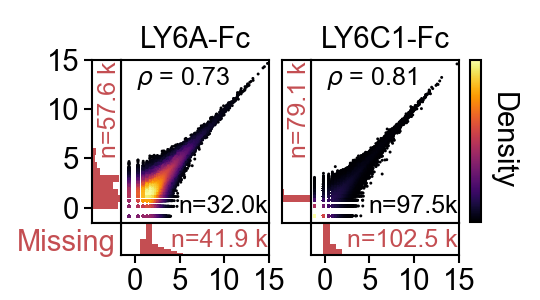

In [12]:
figname = 'fig1B'

png_path = plot_rep_correlations_pulldown(l1_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Fig 1C - Animal correlations (in vivo)

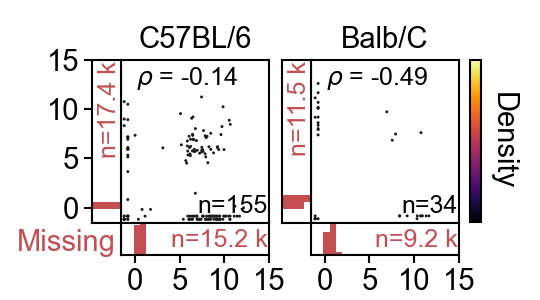

In [13]:
figname = 'fig1C'

png_path = plot_rep_correlations_invivo(l2_invivo_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Figs 1D, 1S1A - Assay versus control scatter

## Fig 1D - Assay versus control scatter (Library 1)

In [14]:
# Compute density kernel - library 1
l1_x_6a, l1_x_6a_missing, l1_y_6a, l1_y_6a_missing, l1_c_6a = density_xy(
    l1_df, 'Fc_log2enr', 'Fc_mean_RPM', 'LY6A_log2enr', 'LY6A_mean_RPM')
l1_x_6c, l1_x_6c_missing, l1_y_6c, l1_y_6c_missing, l1_c_6c = density_xy(
    l1_df, 'Fc_log2enr', 'Fc_mean_RPM', 'LY6C1_log2enr', 'LY6C1_mean_RPM')

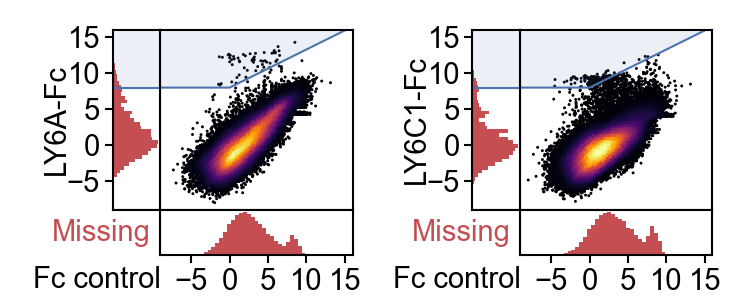

In [15]:
figname = 'fig1D'

png_path = target_vs_fc_scatter(
    l1_x_6a, l1_x_6a_missing, l1_y_6a, l1_y_6a_missing, l1_c_6a,
    l1_x_6c, l1_x_6c_missing, l1_y_6c, l1_y_6c_missing, l1_c_6c,
    fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Fig 1S1A - Assay versus control scatter (Library 2)

In [16]:
# Compute density kernel - library 2
l2_x_6a, l2_x_6a_missing, l2_y_6a, l2_y_6a_missing, l2_c_6a = density_xy(
    l2_df, 'Fc_log2enr', 'Fc_mean_RPM', 'LY6A_log2enr', 'LY6A_mean_RPM')
l2_x_6c, l2_x_6c_missing, l2_y_6c, l2_y_6c_missing, l2_c_6c = density_xy(
    l2_df, 'Fc_log2enr', 'Fc_mean_RPM', 'LY6C1_log2enr', 'LY6C1_mean_RPM')

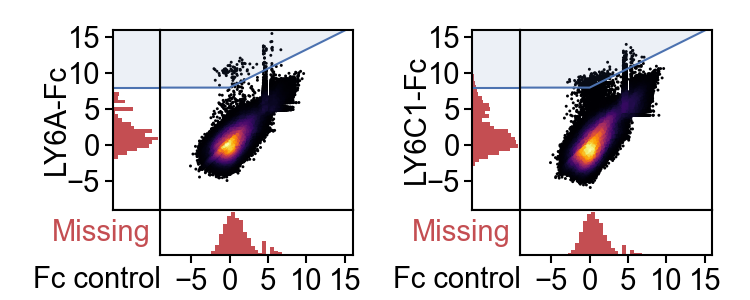

In [17]:
figname = 'fig1S1A'

png_path = target_vs_fc_scatter(
    l2_x_6a, l2_x_6a_missing, l2_y_6a, l2_y_6a_missing, l2_c_6a,
    l2_x_6c, l2_x_6c_missing, l2_y_6c, l2_y_6c_missing, l2_c_6c,
    fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Figs 1E, 1S1B - Enrichment heatmap by replicate

## Fig 1E - Enrichment heatmap by replicate (Library 1)

Inside 6A 5724
Inside 6C 7170


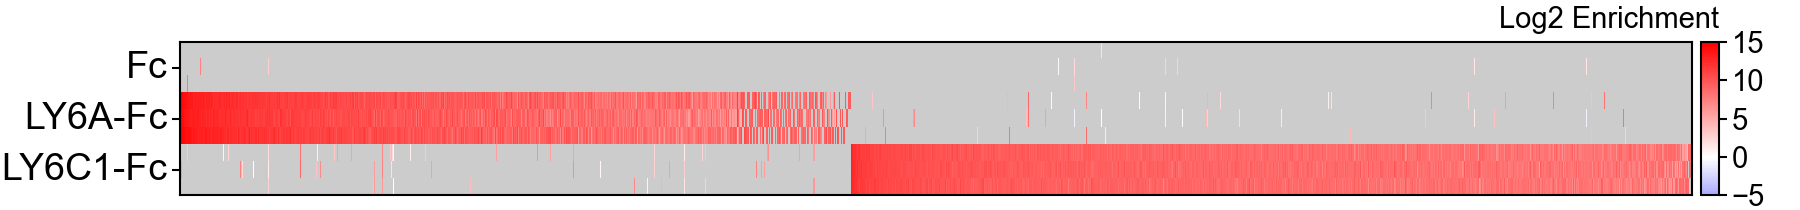

In [18]:
figname = 'fig1E'

png_path, l1_dff, l1_dff_rpm, l1_dff_masked = assay_enrichment_heatmap(
    l1_df, 'Fc_log2enr', 'Fc_mean_RPM', 
    'LY6A_log2enr', 'LY6A_mean_RPM',
    'LY6C1_log2enr', 'LY6C1_mean_RPM',
    'AA_sequence', 'starter_virus_mean_RPM',
    sample_cols = ['Fc', 'LY6A', 'LY6C1'],
    seed=1000,
    fig_outdir=fig_outdir, figname=figname)
l1_dff_umap = l1_dff.copy()
Image(png_path)

## Fig 1S1B - Enrichment heatmap by replicate (Library 2)

Inside 6A 2291
Inside 6C 4214


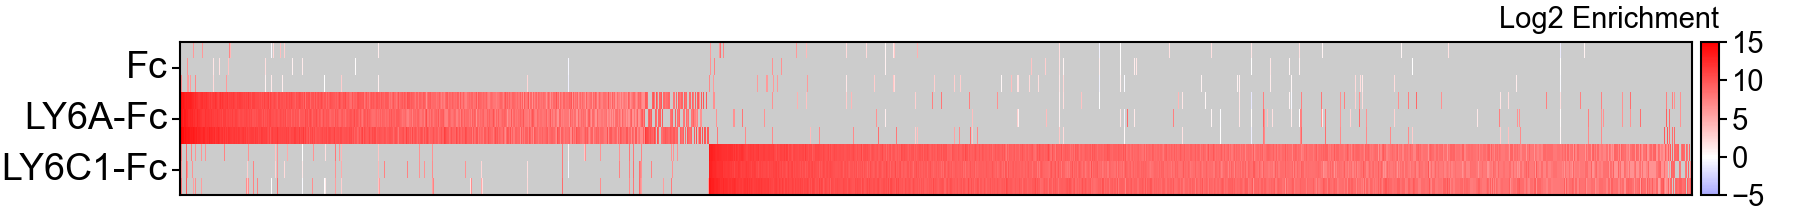

In [19]:
figname = 'fig1S1B'

png_path, l2_dff, l2_dff_rpm, l2_dff_masked = assay_enrichment_heatmap(
    l2_df, 'Fc_log2enr', 'Fc_mean_RPM', 
    'LY6A_log2enr', 'LY6A_mean_RPM',
    'LY6C1_log2enr', 'LY6C1_mean_RPM',
    'AA_sequence', 'starter_virus_mean_RPM',
    sample_cols = ['Fc', 'LY6A', 'LY6C1'],
    seed=1000,
    fig_outdir=fig_outdir, figname=figname)
l2_dff_umap = l2_dff.copy()
Image(png_path)

# Fig 1F,G - UMAP clusters

### UMAP is non-deterministic, so to regenerate the exact plots in the paper, you'll need to use our UMAP results.
You can generate your own UMAP, but it will be slightly different (and produce different clusters).

In [19]:
use_umap_from_paper = True

In [20]:
# Fit UMAP and Gaussian mixture model on data
if use_umap_from_paper:
    ly6a_umap = pd.read_csv(data_dir + 'LY6A_joint_umap_l1_l2.csv')
    ly6c1_umap = pd.read_csv(data_dir + 'LY6C1_joint_umap_l1_l2.csv')

else:
    ly6a_umap, ly6c1_umap = fit_umap(l1_dff_umap, l2_dff_umap, umap_outdir='UMAPs')

gm_ly6a, gm_ly6c1 = make_umap_GM_clusters(ly6a_umap, ly6c1_umap)

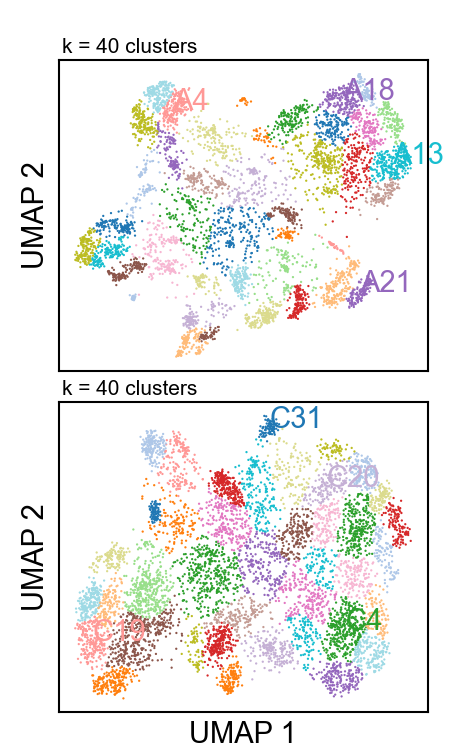

In [21]:
figname = 'fig1FG' # Note: cluster labels positioning differs from paper figure (changed in post-processing)

ly6a_umap_l1 = ly6a_umap.loc[ly6a_umap['dataset'] == 'library1'].copy()
ly6c1_umap_l1 = ly6c1_umap.loc[ly6c1_umap['dataset'] == 'library1'].copy()

png_path, [ly6a_umap_l1, ly6c1_umap_l1] = plot_umap_clusters_fewerlabels(ly6a_umap_l1, ly6c1_umap_l1, gm_ly6a, gm_ly6c1,
          fig_outdir=fig_outdir, figname=figname)
Image(png_path)

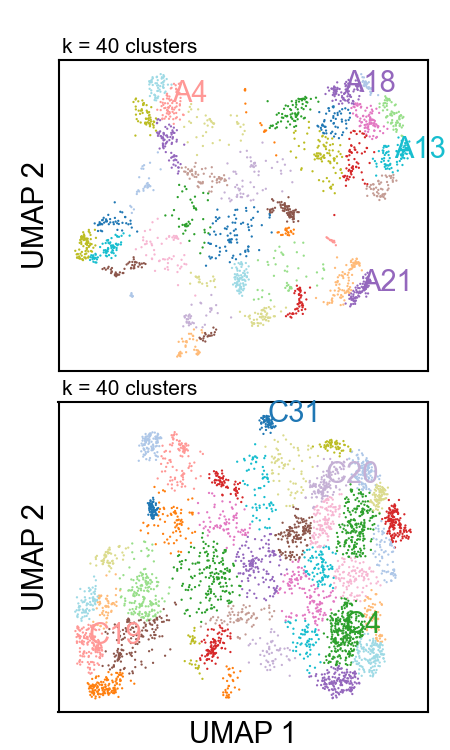

In [22]:
figname = 'fig1FG_v2-lib2' # Figure not shown in paper

ly6a_umap_l2 = ly6a_umap.loc[ly6a_umap['dataset'] == 'library2'].copy()
ly6c1_umap_l2 = ly6c1_umap.loc[ly6c1_umap['dataset'] == 'library2'].copy()

png_path, [ly6a_umap_l2, ly6c1_umap_l2] = plot_umap_clusters_fewerlabels(ly6a_umap_l2, ly6c1_umap_l2, gm_ly6a, gm_ly6c1,
          fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 1H,I - Heatmap of motifs by cluster

In [23]:
# Assign variants to motif clusters (Library 1)

l1_ly6a = ly6a_umap_l1
l1_ly6c1 = ly6c1_umap_l1

l1_motif_ly6a = assign_motifs(l1_ly6a)
l1_motif_ly6c1 = assign_motifs(l1_ly6c1)

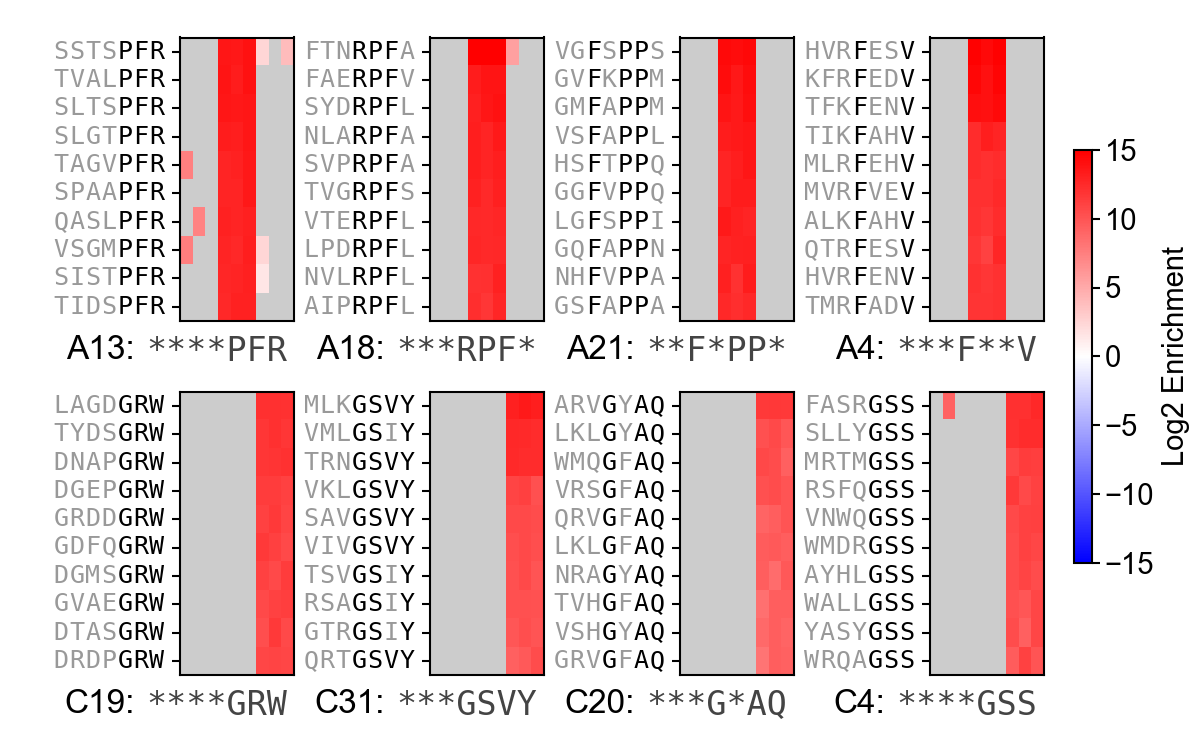

In [24]:
figname = "fig1HI"

png_path = indiv_motif_plot(l1_dff_masked, l1_ly6a, l1_ly6c1, l1_motif_ly6a, l1_motif_ly6c1, 
                 fig_outdir=fig_outdir, figname=figname)
Image(png_path)

In [25]:
# Assign variants to motif clusters (Library 2)

l2_ly6a = ly6a_umap_l2
l2_ly6c1 = ly6c1_umap_l2

l2_motif_ly6a = assign_motifs(l2_ly6a)
l2_motif_ly6c1 = assign_motifs(l2_ly6c1)

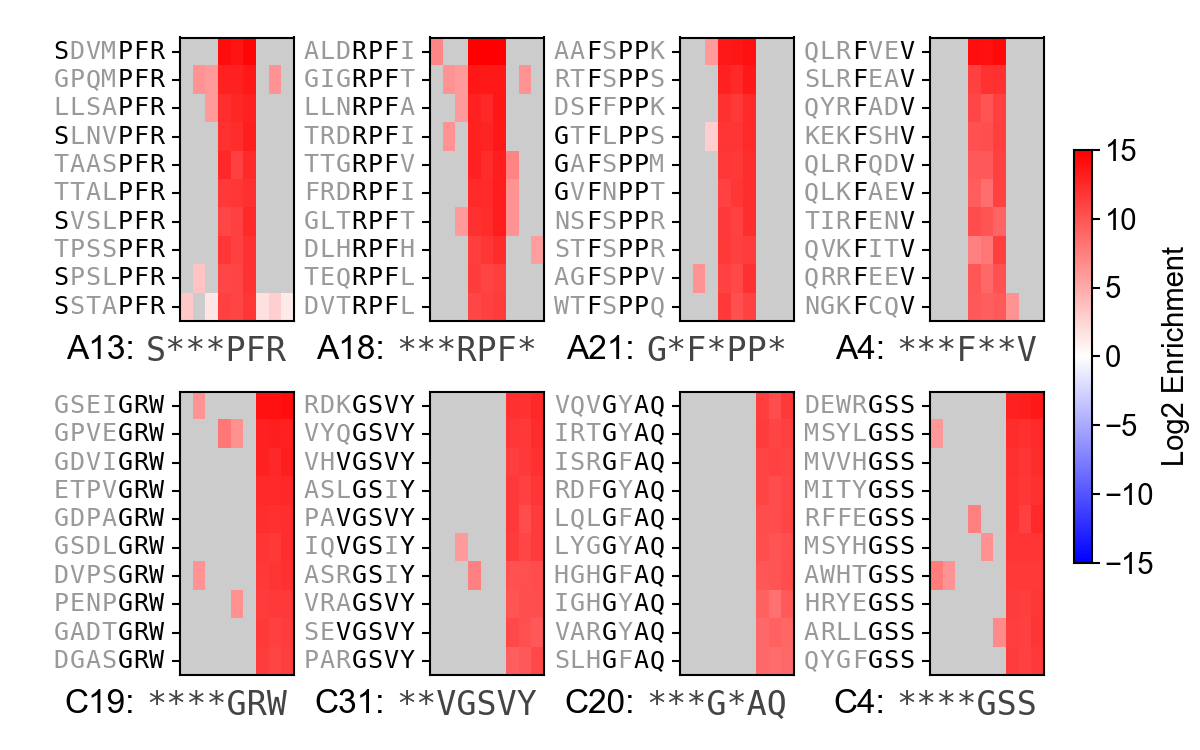

In [26]:
figname = 'fig1H1_v2-lib2' # Figure not shown in paper

png_path = indiv_motif_plot(l2_dff_masked, l2_ly6a, l2_ly6c1, l2_motif_ly6a, l2_motif_ly6c1, 
                 fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Figs 1S2A-J - Replicability

**Note:** Due to the size of the data for Library 1 and Library 2 pulldown assays, computing the density kernels for their respective replicate correlations is relatively computationally expensive. Figs 1S2A-D and 1S2E-H may take some extra time to render.

## Figs 1S2A-D - Replicability (Library 1)

**Note:** Text color in "Missing" marginal distribuions for "Fc control" panel (4th panel) was edited in post-processing for visibility. 

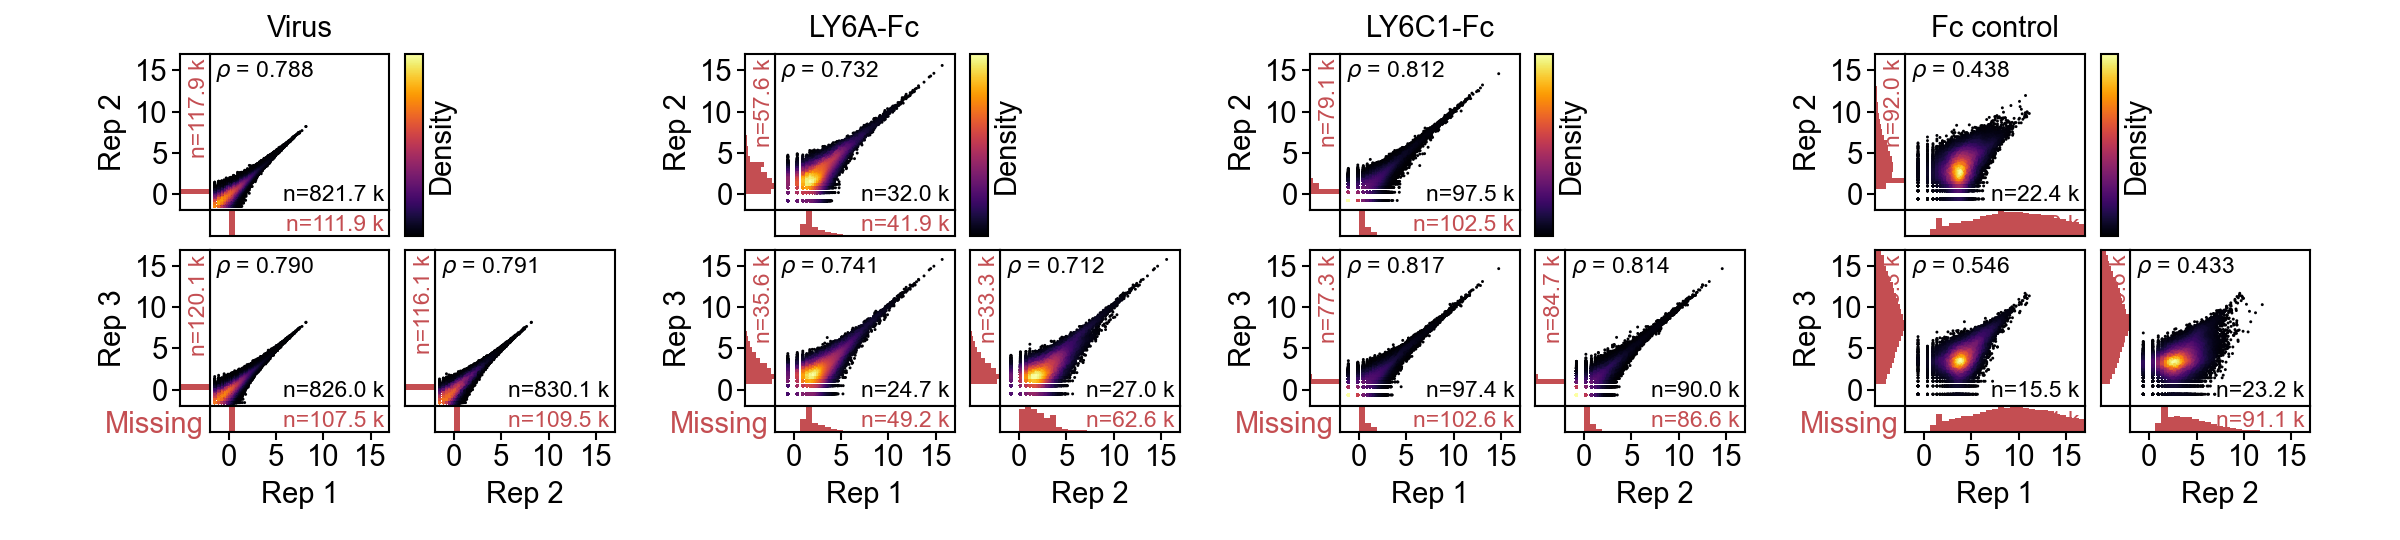

In [28]:
figname = 'fig1S2ABCD'
png_path = plot_r1_replicability_pulldown(l1_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Figs 1S2E-H - Replicability (Library 2)

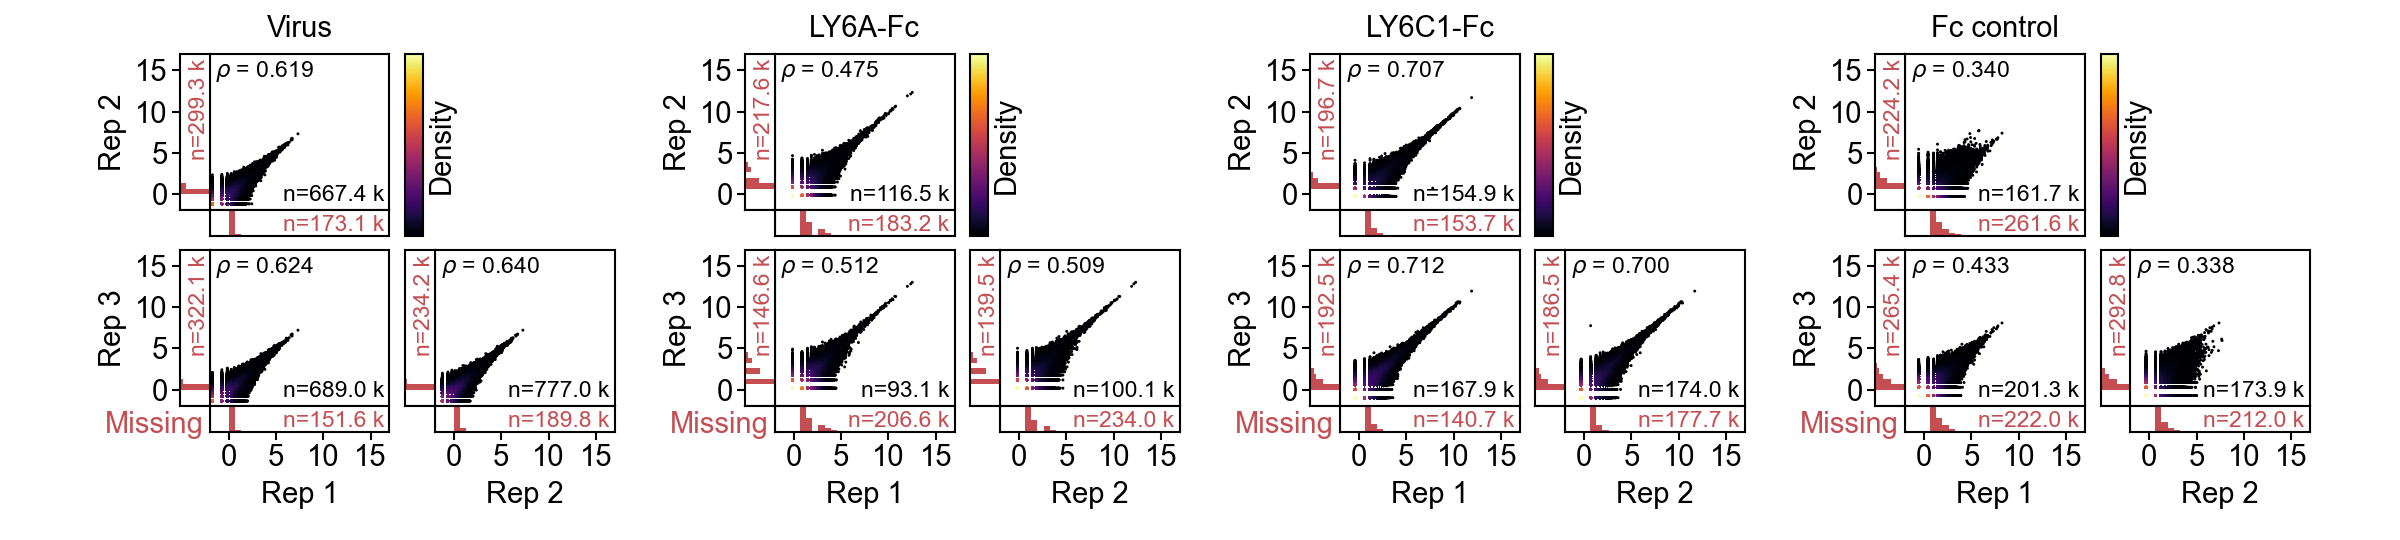

In [29]:
figname = 'fig1S2EFGH'
png_path = plot_r1_replicability_pulldown(l2_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Figs 1S2I,J - Replicability (in vivo)

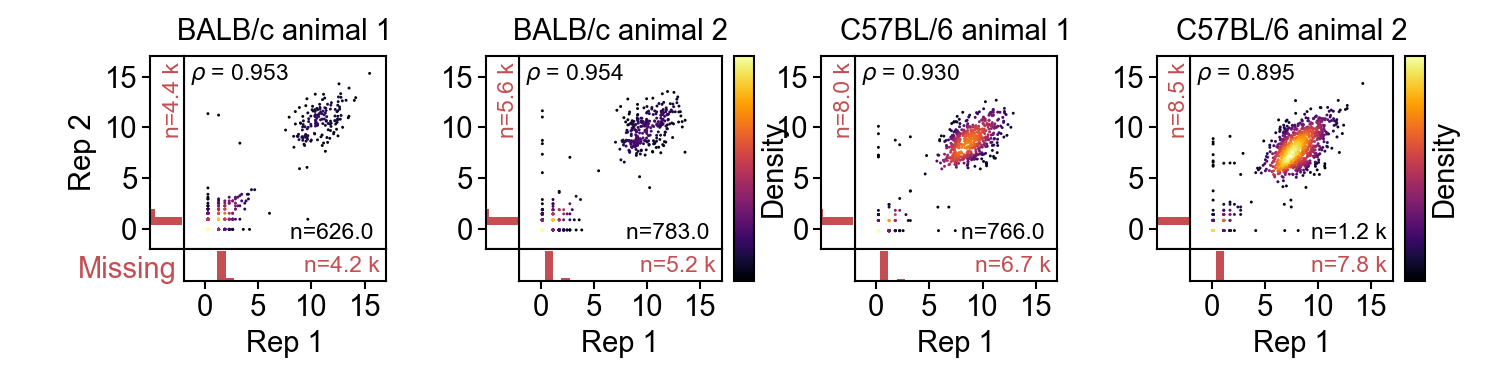

In [30]:
figname = 'fig1S2IJ'
png_path = plot_r1_replicability_invivo(l2_invivo_df, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Figs 1S3A,B - Joint UMAPs

## Fig 1S3A - Joint UMAP of Library 1 and Library 2

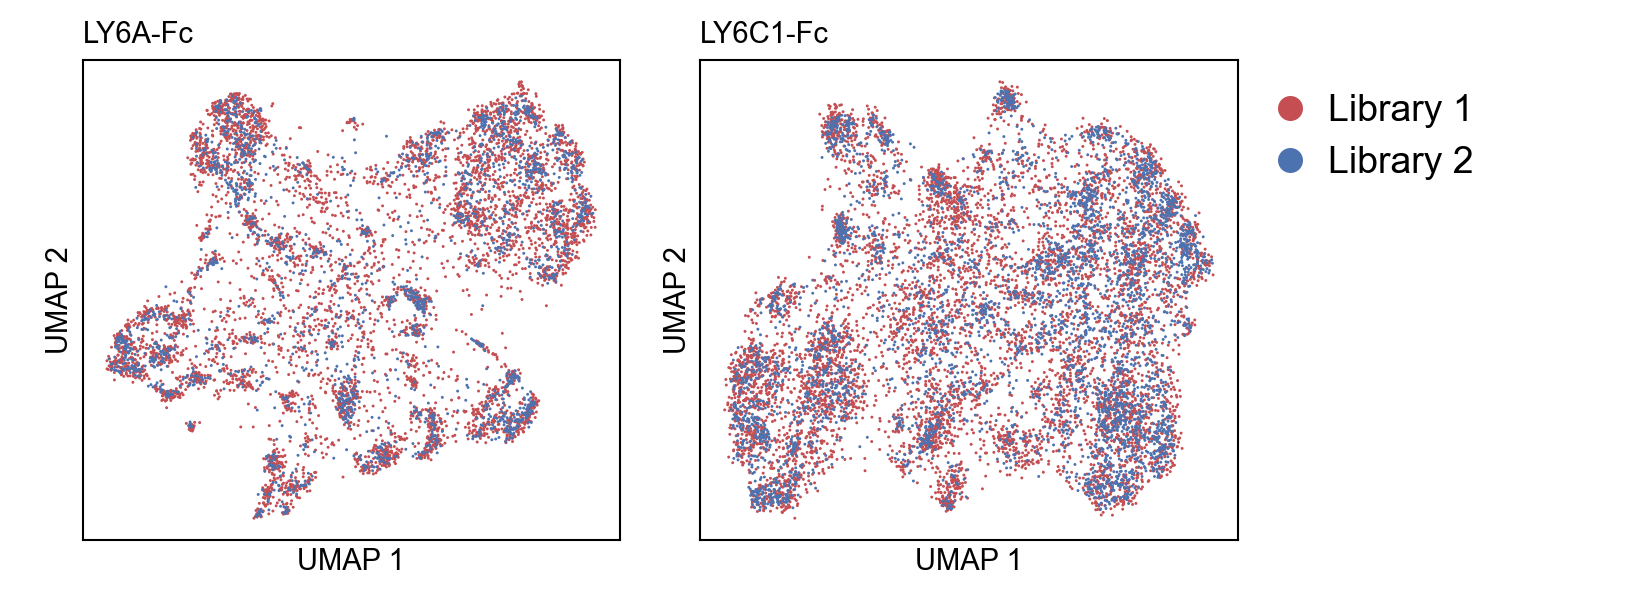

In [31]:
figname = 'fig1S3A'
png_path = plot_joint_umap(ly6a_umap, ly6c1_umap, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Fig 1S3B - UMAP clusters with all cluster labels

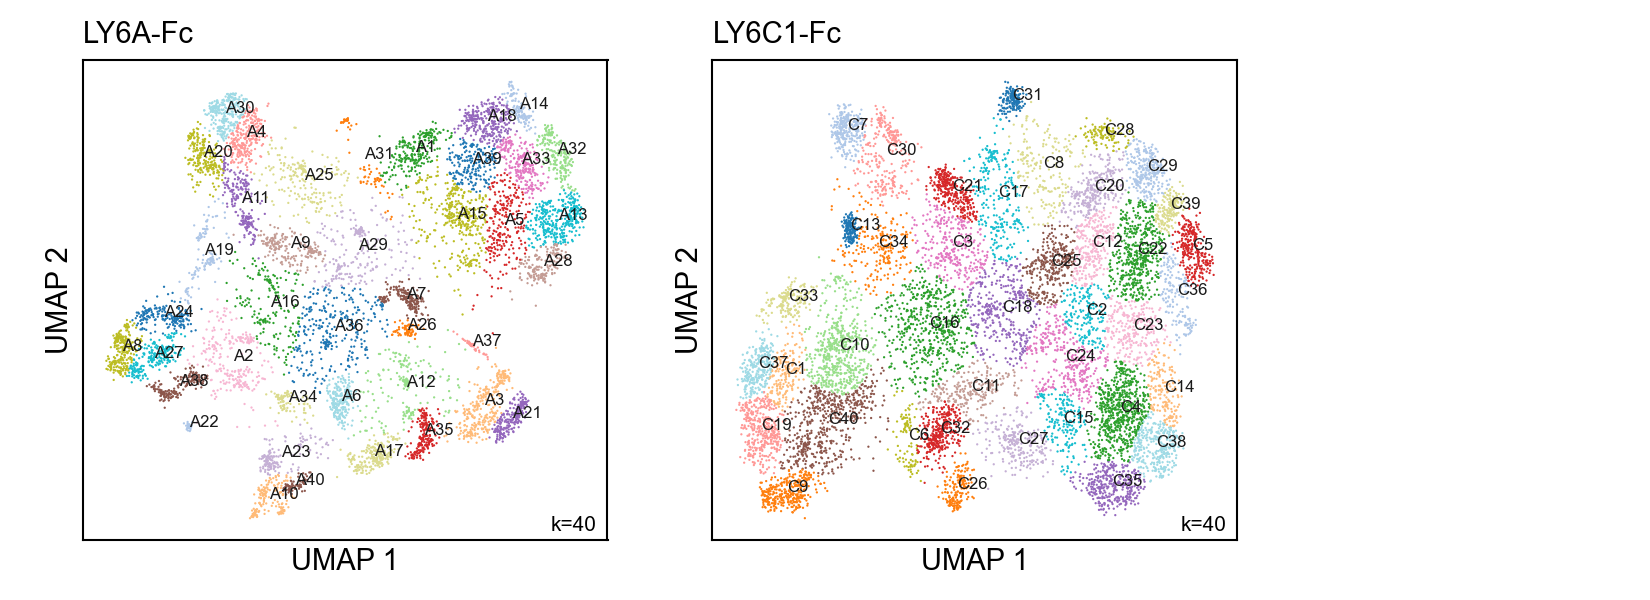

In [32]:
figname = 'fig1S3B'
png_path = plot_umap_clusters(ly6a_umap, ly6c1_umap, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 1S3C - Cluster dataset proportions

## Fig 1S3C - Cluster dataset proportions

/Users/barrya/AAV_capsid_repo_folder/AAV_capsid_receptor/figures/utils/fig1_utils.py:1761: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


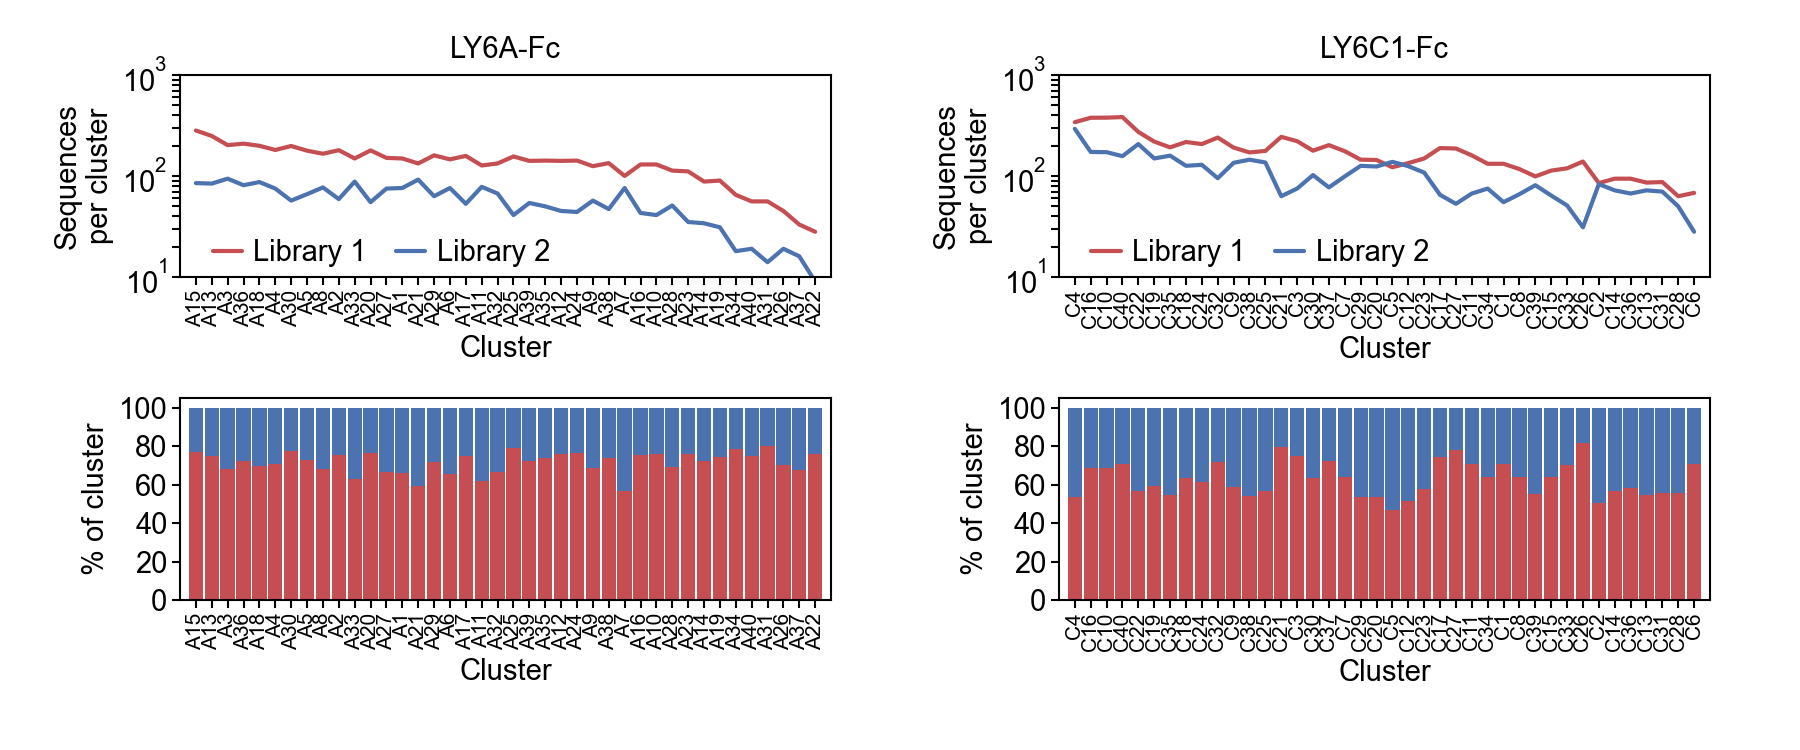

In [33]:
figname = 'fig1S3C'
png_path = cluster_dataset_proportions(ly6a_umap, ly6c1_umap, fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Fig 1S4A,B - All motifs

## Fig 1S4A - All motifs (LY6A-Fc)

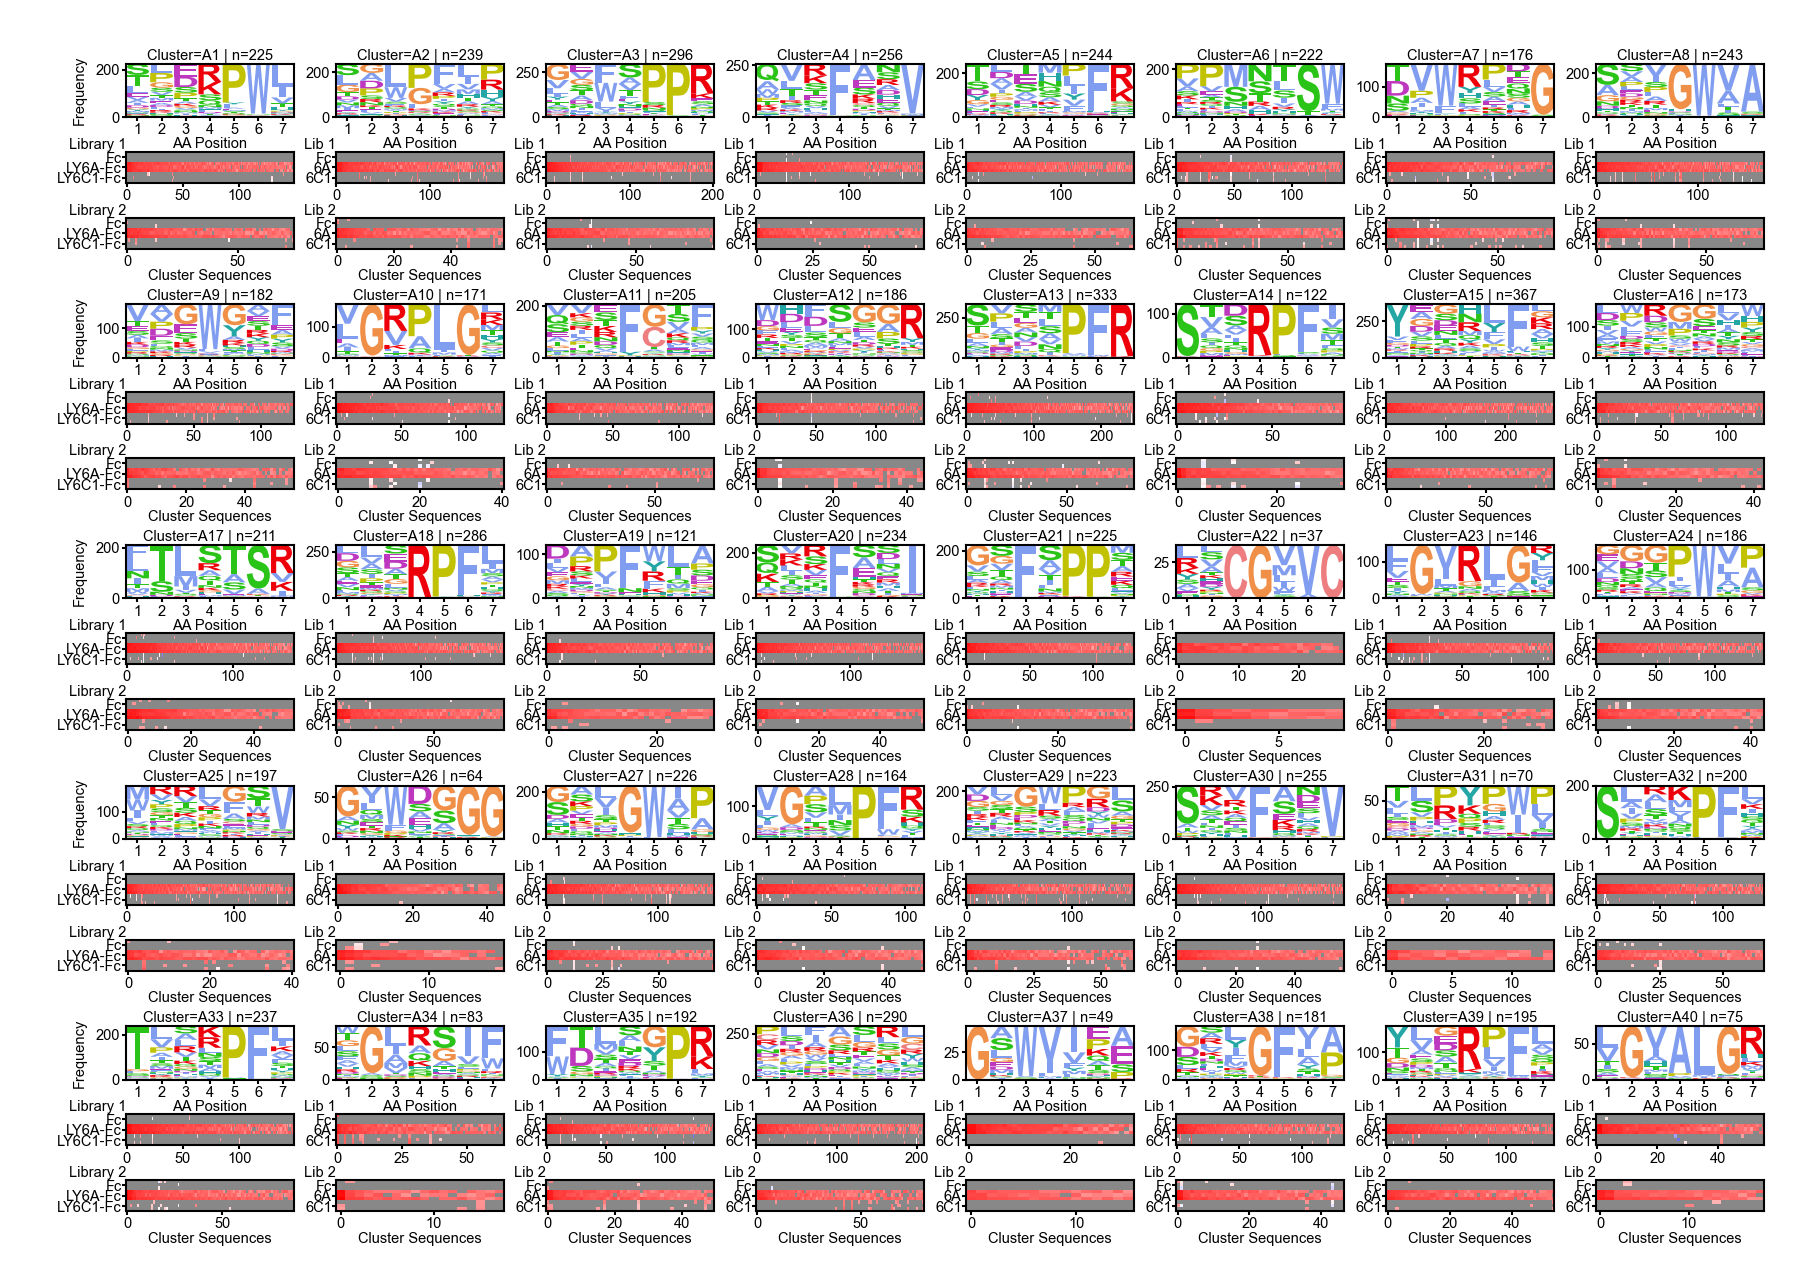

In [34]:
figname = 'fig1S4A'

png_path = plot_all_motifs(ly6a_umap, l1_ly6a, l1_motif_ly6a, l1_dff_masked,
                l2_ly6a, l2_motif_ly6a, l2_dff_masked,
                ncol=8, cluster_prefix='A', fontsize=3.5,
                fig_outdir=fig_outdir, figname=figname)
Image(png_path)

## Fig 1S4B - All motifs (LY6C1-Fc)

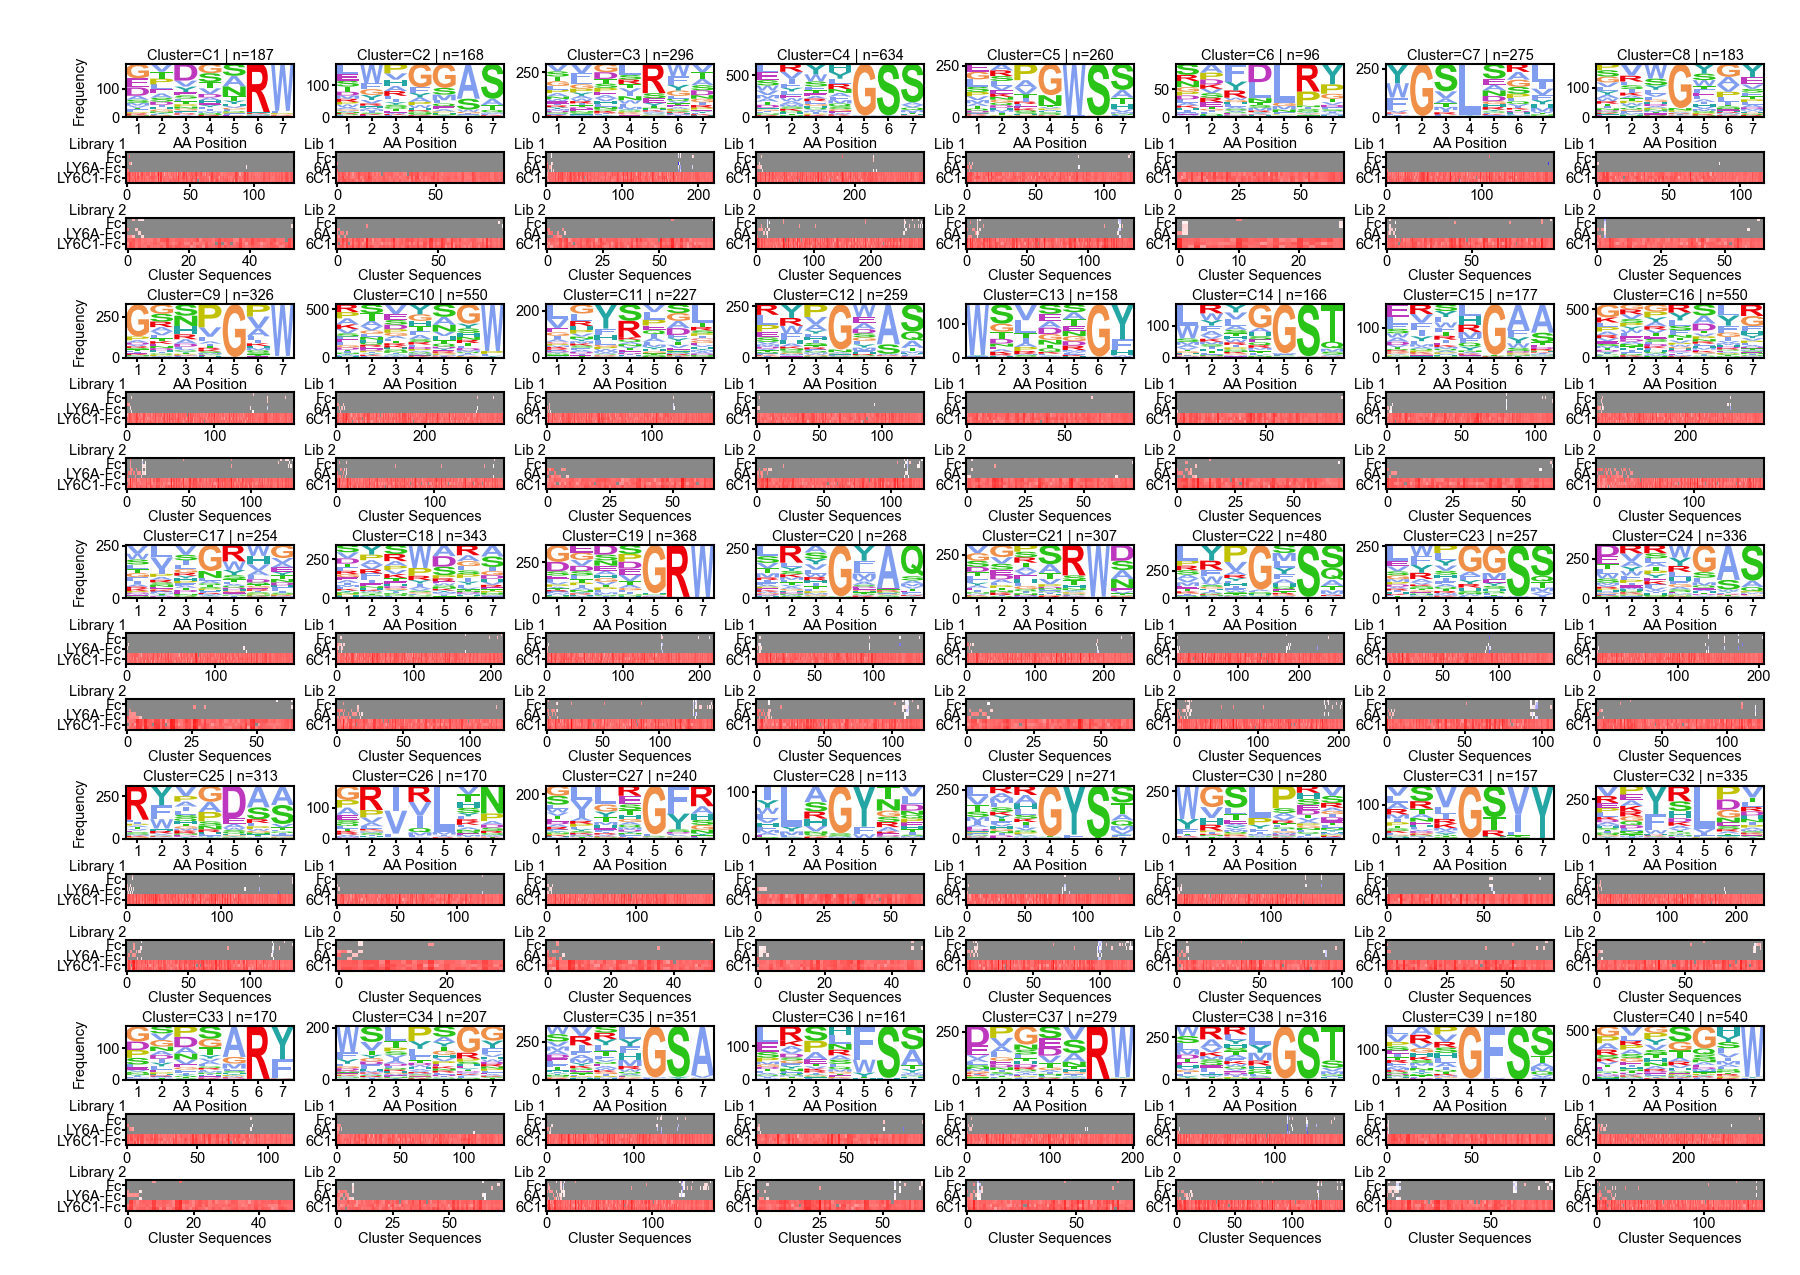

In [35]:
figname = 'fig1S4B'

png_path = plot_all_motifs(ly6c1_umap, l1_ly6c1, l1_motif_ly6c1, l1_dff_masked,
                l2_ly6c1, l2_motif_ly6c1, l2_dff_masked,
                ncol=8, cluster_prefix='C', fontsize=3.5,
                fig_outdir=fig_outdir, figname=figname)
Image(png_path)

# Supplemental Tables S1-6 

In [36]:
# Set the directory for where to save tables, create the directory if it doesn't exist
tables_outdir = 'tables'
Path(tables_outdir).mkdir(parents=True, exist_ok=True)

In [37]:
tablename = 'tableS1_library1_clusters'

l1_cluster_df = make_cluster_df(l1_motif_ly6a, l1_motif_ly6c1)
l1_cluster_df.to_csv('{}/{}.csv'.format(tables_outdir, tablename), index=False)
l1_cluster_df.head()

receptor  cluster  n_seqs consensus_sequence flexible_consensus  \
0     LY6A        1     149            ****PW*        ****[P][W]*   
1     LY6A        2     180            **LPF**      **[L][P][F]**   
2     LY6A        3     202            ****PPR      ****[P][P][R]   
3     LY6A        4     181            ***F**V        ***[F]**[V]   
4     LY6A        5     178            *****FR        *****[F][R]   

   UMAP1_centroid  UMAP2_centroid  LY6A-Fc_mean_log2enr  \
0       17.661950        9.256359              9.609192   
1       14.169677        5.439269              9.602668   
2       18.950081        4.617449              9.759842   
3       14.460803        9.542244              9.924842   
4       19.385304        7.902908              9.451919   

   LY6C1-Fc_mean_log2enr  Fc_mean_log2enr  
0              -0.178162        -0.402753  
1               0.043786        -0.500293  
2              -0.136076        -0.426166  
3              -0.374230        -0.584700  
4              -0.299181        -0.406685

In [38]:
tablename = 'tableS2_library1_ly6a_cluster_seqs'

l1_cluster_seq_df_ly6a = make_cluster_seq_df(l1_motif_ly6a, l1_ly6a)
l1_cluster_seq_df_ly6a.to_csv('{}/{}.csv'.format(tables_outdir, tablename), index=False)
l1_cluster_seq_df_ly6a.head()

AA_sequence  cluster  LY6A-Fc_log2enr  LY6C1-Fc_log2enr  Fc_log2enr  \
0     AACGVVC       22        10.234247               0.0         0.0   
1     AAEWGSF        9        12.330525               0.0         0.0   
2     AAFERPR        3         8.433376               0.0         0.0   
3     AAFSPPK       21         9.088314               0.0         0.0   
4     AAIFNLV        4         8.682066               0.0         0.0   

       UMAP1     UMAP2  
0  13.371140  4.272812  
1  14.819923  7.592665  
2  18.666485  4.085686  
3  19.296343  4.145449  
4  14.294394  9.672989

In [39]:
tablename = 'tableS3_library1_ly6c1_cluster_seqs'

l1_cluster_seq_df_ly6c1 = make_cluster_seq_df(l1_motif_ly6c1, l1_ly6c1)
l1_cluster_seq_df_ly6c1.to_csv('{}/{}.csv'.format(tables_outdir, tablename), index=False)
l1_cluster_seq_df_ly6c1.head()

AA_sequence  cluster  LY6A-Fc_log2enr  LY6C1-Fc_log2enr  Fc_log2enr  \
0     AAERMLW       40         0.000000         10.227492    0.000000   
1     AAFMGSA       35         0.000000          9.611400    0.000000   
2     AAFSNGW       10         0.000000          8.794532    0.000000   
3     AAGREWV        3        -5.149918          8.287681   -5.149918   
4     AAGSYSW       40         0.000000          8.775446    0.000000   

       UMAP1     UMAP2  
0   7.521855 -3.076778  
1  12.005670 -4.443733  
2   6.118788 -2.723342  
3   9.082786 -1.492415  
4   6.236417 -3.385603

In [40]:
tablename = 'tableS4_library2_clusters'

l2_cluster_df = make_cluster_df(l2_motif_ly6a, l2_motif_ly6c1)
l2_cluster_df.to_csv('{}/{}.csv'.format(tables_outdir, tablename), index=False)
l2_cluster_df.head()

receptor  cluster  n_seqs consensus_sequence flexible_consensus  \
0     LY6A        1      76            ****PWL      ****[P][W][L]   
1     LY6A        2      59            **LP***        **[L][P]***   
2     LY6A        3      94            **W*PPR    **[W]*[P][P][R]   
3     LY6A        4      75            ***F**V        ***[F]**[V]   
4     LY6A        5      66            *****FR        *****[F][R]   

   UMAP1_centroid  UMAP2_centroid  LY6A-Fc_mean_log2enr  \
0       17.690163        9.246571              9.462142   
1       14.223823        5.497998              9.301553   
2       19.094705        4.699831              9.614115   
3       14.397311        9.441172              9.446841   
4       19.328733        7.931875              9.317329   

   LY6C1-Fc_mean_log2enr  Fc_mean_log2enr  
0               0.207447        -0.087770  
1               0.616911         0.024227  
2               0.069362        -0.183006  
3              -0.016613        -0.212790  
4               0.325077        -0.173601

In [41]:
tablename = 'tableS5_library2_ly6a_cluster_seqs'

l2_cluster_seq_df_ly6a = make_cluster_seq_df(l2_motif_ly6a, l2_ly6a)
l2_cluster_seq_df_ly6a.to_csv('{}/{}.csv'.format(tables_outdir, tablename), index=False)
l2_cluster_seq_df_ly6a.head()

AA_sequence  cluster  LY6A-Fc_log2enr  LY6C1-Fc_log2enr  Fc_log2enr  \
5555     AADRPFL       18         9.315223               0.0    0.000000   
5556     AAEGWIA       27         8.456885               0.0    0.000000   
5557     AAEGWVA        8         9.207171               0.0    0.000000   
5558     AAFSPPK       21        13.746688               0.0    4.398267   
5559     AAGWGAA        9         9.473799               0.0    0.000000   

          UMAP1     UMAP2  
5555  18.651642  9.817736  
5556  12.200293  5.238817  
5557  12.119725  5.683367  
5558  19.308405  4.193319  
5559  15.181628  7.334547

In [45]:
tablename = 'tableS6_library2_ly6c1_cluster_seqs'

l2_cluster_seq_df_ly6c1 = make_cluster_seq_df(l2_motif_ly6c1, l2_ly6c1)
l2_cluster_seq_df_ly6c1.to_csv('{}/{}.csv'.format(tables_outdir, tablename), index=False)
l2_cluster_seq_df_ly6c1.head()

AA_sequence  cluster  LY6A-Fc_log2enr  LY6C1-Fc_log2enr  Fc_log2enr  \
7045     AADTSYW       10         0.000000          8.018051    0.000000   
7046     AADYMRY       33         0.000000          8.002452    0.000000   
7047     AAEFGSS        4         0.000000          9.280636    0.000000   
7048     AAFHLPV       32         0.000000          9.680388    0.000000   
7049     AAFKLPT       32        -2.871473         10.491537    3.445056   

          UMAP1     UMAP2  
7045   6.674578 -2.959739  
7046   5.754703 -1.911278  
7047  12.145509 -3.487599  
7048   8.663305 -4.070801  
7049   8.518286 -4.053909